In [7]:
import torch
import torch.nn as nn
import torchvision

def create_resnet18_model(classes:int = 2, seed:int=42):
    # Load pretrained weights
    weights = torchvision.models.ResNet18_Weights.DEFAULT
    transforms = weights.transforms()

    # Load model with pretrained weights
    model = torchvision.models.resnet18(weights=weights)

    # Freeze all parameters
    for param in model.parameters():
        param.requires_grad = False

    # Set seed for reproducibility
    torch.manual_seed(seed)

    # Replace the final fully connected layer
    model.fc = nn.Sequential(
        nn.Linear(512, 256),
        nn.ReLU(),
        nn.Dropout(0.4),
        nn.Linear(256, 128),
        nn.ReLU(),
        nn.Dropout(0.3),
        nn.Linear(128, 2)
    )


    return model, transforms


In [8]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [9]:
resnet_model , _= create_resnet18_model(seed=42)
state_dict = torch.load("/content/eye_detector.pth" , map_location=device)
resnet_model.load_state_dict(state_dict)
resnet_model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [11]:
resnet_model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

0
Predicted: Closed Eye


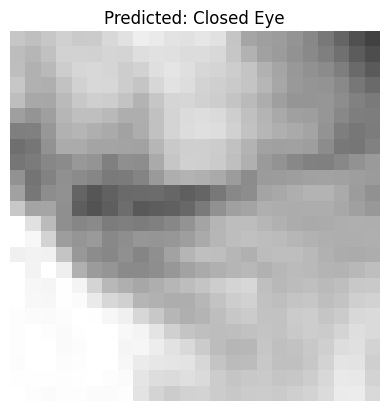

In [15]:
import torch
from PIL import Image
from torchvision import transforms
import matplotlib.pyplot as plt

# ✅ Image transforms (should match training)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.CenterCrop((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# ✅ Load image
img = Image.open('/content/test6.jpg').convert("RGB")
input_tensor = transform(img).unsqueeze(0).to(device)  # (1, C, H, W)

# ✅ Set model to eval mode
resnet_model.eval()

# ✅ Predict
with torch.no_grad():
    output = resnet_model(input_tensor)  # shape: [1, 2]
    pred_class = torch.argmax(output, dim=1).item()  # class index: 0 or 1
    print(pred_class)
# ✅ Map index to label
label_map = {0: "Closed Eye", 1: "Open Eye"}

print(f"Predicted: {label_map[pred_class]}")

plt.imshow(img)
plt.title(f"Predicted: {label_map[pred_class]}")
plt.axis('off')
plt.show()
